In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
path = "second_cars_info.csv"
data = pd.read_csv(path, encoding="gbk")

In [9]:
data.shape

(11281, 7)

In [12]:
#发现boarding_time字段中有“未上牌”的数据，需要处理
#先查看“未上牌”在整个数据集中占比例多少
N = np.sum(data.Boarding_time=="未上牌")
N / data.shape[0]

0.00824395000443223

In [13]:
data = data[data.Boarding_time!="未上牌"]

In [16]:
#处理后索引会乱，需要重新整理索引
data.index = np.arange(0,data.shape[0])

In [20]:
data.head()
#将Boarding_time中的年份单独提取出来
data["year"] = data.Boarding_time.str[:4].astype("int")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014


In [21]:
#将Boarding_time中的月份单独提取出来
data["month"] = data.Boarding_time.str[5:-1].astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9


In [23]:
#新增一列，表示该车上牌多少个月了？
#当前数据是2017年10月收集的
data["diff_months"] = (2017-data.year) * 12 + (10-data.month)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37


In [34]:
#data["Km_new"] = data.Km.str[:-3]
#数据内还包含有“百公里”字样，需要去除
index = data[~(data.Km_new.str.contains("百"))].index
data = data.loc[index,:]
data["Km_new"] = data.Km_new.astype("float")

In [35]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81


In [37]:
data = data.loc[data.New_price!="暂无",:]
data["New_price_new"] = data.New_price.str[:-1].astype("float")

In [38]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new,New_price_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00,50.89
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00,50.89
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00,54.24
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80,101.06
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81,54.99


In [51]:
#查看不同价格区间的二手车，在当前数据集中的占比情况
sec_price_min = data.Sec_price.min()
sec_price_max = data.Sec_price.max()
#[sec_price_min,sec_price_max]
#cut函数可以对数据进行切分，bins参数表示切分的规则
price_cut = pd.cut(data.Sec_price, bins=[sec_price_min,3,5,8,10,15,20,30,100,sec_price_max])
#不同价格区间的车的数量
price_state = price_cut.value_counts()
#price_state
#[i for i in price_state/price_state.sum()]

[0.17812585374738185,
 0.16300883343957745,
 0.15180766778981877,
 0.11902376832711047,
 0.09926236226208907,
 0.08915399326108733,
 0.08323467808032055,
 0.07376377379109371,
 0.04261906930152081]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


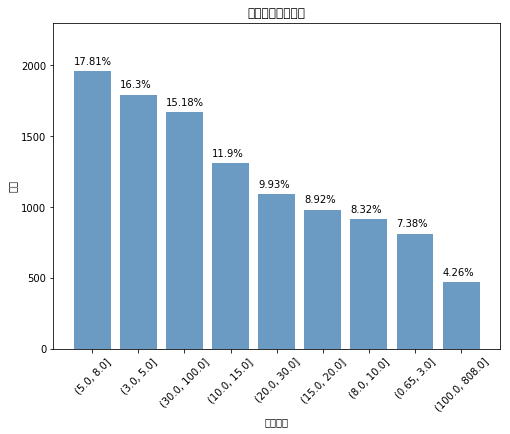

In [56]:
#plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
#plt.rcParams["axes.unicode_minus"] = False
X = np.arange(len(price_state))
Y = price_state
plt.figure(figsize=(8,6))
plt.bar(X,Y,color="steelblue",alpha=0.8)
plt.xticks(np.arange(len(price_state)),price_state.index,rotation=45)
plt.xlabel("价格区间")
plt.ylabel("数量")
plt.title("二手车价格分布图")
plt.ylim([0,2300])
percents = [str(round(i*100,2))+"%" for i in price_state/price_state.sum()]

for x,y,z in zip(X,Y,percents):
    plt.text(x-0.4,y+50,z)

In [58]:
#分析汽车使用时长、公里数及价格之间的关系
#只分析奥迪、大众
index = data["Brand"].isin(["奥迪","大众"])
some_cars = data.loc[index,:]
#some_cars.head()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


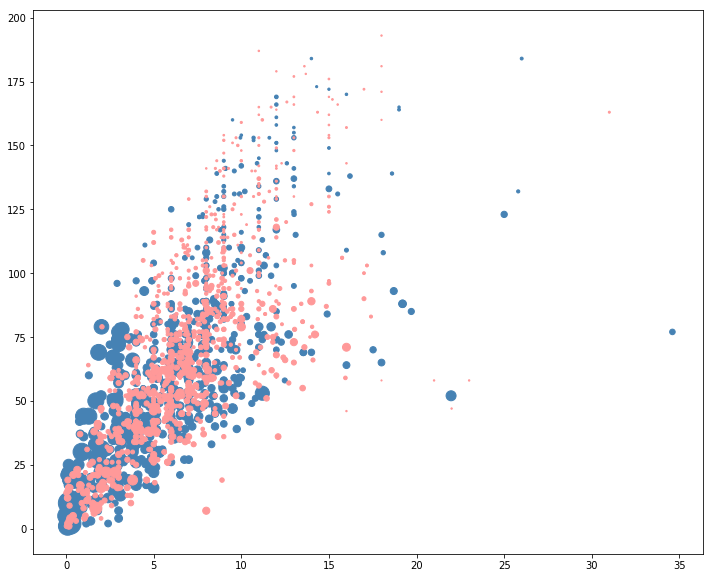

In [62]:
plt.figure(figsize=(12,10))
brands = ["奥迪","大众"]
colors = ["steelblue","#ff9999"]
for i in range(len(brands)):
    plt.scatter(some_cars[some_cars["Brand"]==brands[i]]["Km_new"],
    some_cars[some_cars["Brand"]==brands[i]]["diff_months"],
    s=some_cars[some_cars["Brand"]==brands[i]]["Sec_price"]*2,
    c=colors[i],
    )